# 1. Introduction

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

My first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, I have been given data from a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

Each customer participating in the survey has also been asked whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

If more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, I will advise RR Diner to strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, I won't advise them to strike the deal and the Hidden Farm coffee will remain in legends only. 70% seems like a reasonable threshold, but it is not a universal threshold. 

To solve the problem, then, I will build a decision tree to implement a classification solution. 

This case study uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 2. Sourcing and loading

**2a. Import relevant libraries**

In [82]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
import pydotplus

**2b. Load data**

In [83]:
coffeeData = pd.read_csv('data/RRDinerCoffeeData.csv')

**2c. Preliminary data analysis**

In [84]:
coffeeData.head()

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0


In [85]:
coffeeData.shape

(702, 9)

In [86]:
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_week               702 non-null    int64  
 4   spent_month              702 non-null    int64  
 5   SlrAY                    702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.5+ KB


In [87]:
coffeeData.describe()

,Age,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,474.000000
mean,34.243590,2.710826,32.853276,107.923077,43819.843305,4.559186,0.531339,0.639241
std,13.927945,1.593629,15.731878,55.348485,26192.626943,3.116275,0.499373,0.480728
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,1.000000,24.250000,62.000000,22812.250000,1.877812,0.000000,0.000000
50%,28.000000,3.000000,36.000000,113.500000,41975.000000,4.196167,1.000000,1.000000
75%,46.000000,4.000000,43.000000,150.750000,60223.000000,6.712022,1.000000,1.000000
max,90.000000,5.000000,62.000000,210.000000,182058.000000,10.986203,1.000000,1.000000


# 3. Data Wrangling
**3a. Cleaning the data**

First, I'll change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [88]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [89]:
coffeeData = coffeeData.rename(columns = {'spent_week':'spent_last_week',
                                         'spent_month': 'spent_last_month',
                                         'SlrAY': 'salary'})

In [90]:
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [91]:
coffeeData['Gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: Gender, dtype: object

In [92]:
coffeeData['Gender'].value_counts(dropna=False)

Male      355
Female    340
f           1
female      1
MALE        1
M           1
F           1
male        1
FEMALE      1
Name: Gender, dtype: int64

We can see a bunch of inconsistency here.

I will use replace() to make the values of the `gender` column just `Female` and `Male`.

In [93]:
coffeeData['Gender'].replace(['f ', 'female', 'F', 'FEMALE'], 'Female', inplace=True)

In [94]:
coffeeData['Gender'].value_counts(dropna=False)

Male      355
Female    344
MALE        1
M           1
male        1
Name: Gender, dtype: int64

In [95]:
coffeeData['Gender'].replace(['male', 'MALE', 'M'], 'Male', inplace=True)

In [96]:
coffeeData['Gender'].value_counts(dropna=False)

Male      358
Female    344
Name: Gender, dtype: int64

In [97]:
coffeeData['Decision'].value_counts(dropna=False)

1.0    303
NaN    228
0.0    171
Name: Decision, dtype: int64

We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [98]:
coffeeData['Decision'].replace(1.0, 'YES', inplace=True)
coffeeData['Decision'].replace(0.0, 'NO', inplace=True)

In [99]:
coffeeData['Decision'].value_counts(dropna=False)

YES    303
NaN    228
NO     171
Name: Decision, dtype: int64

## 4. Train/test split
To execute the train/test split properly, I need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

**4a. Drop all null values within the `Decision` column, and save the result as NoPrediction**

In [100]:
NOPrediction = coffeeData.dropna()
NOPrediction['Decision'].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

**4b. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis**

,count,mean,std,min,25%,50%,75%,max
Decision,,,,,,,,
NO,171.0,20.678363,14.426550,0.0,0.0,24.0,32.0,45.0
YES,303.0,39.316832,12.084085,0.0,34.0,40.0,47.0,62.0


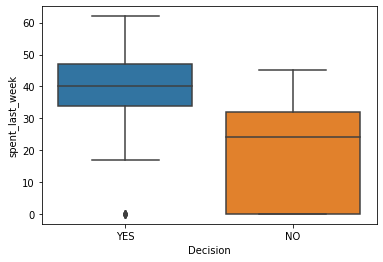

In [101]:
_ = sns.boxplot(data=NOPrediction, x='Decision', y='spent_last_week')
NOPrediction['spent_last_week'].groupby(NOPrediction['Decision']).describe()

Clients who spent more last week are much more likely to buy this new coffee from China.

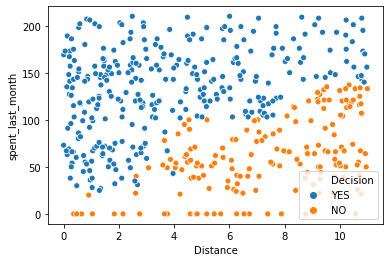

In [102]:
_ = sns.scatterplot(data=NOPrediction, x='Distance', y='spent_last_month', hue='Decision')

Judging by a client's distance from us and how much they spent last month, we could potentially predict whether they would buy the new coffee or not.

**4c. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction**

In [103]:
Prediction = coffeeData[coffeeData['Decision'].isnull()]
Prediction['Decision'].value_counts(dropna=False)

NaN    228
Name: Decision, dtype: int64

In [104]:
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


**4d. Divide the NOPrediction subset into X and y**

In [105]:
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [106]:
features = [column for column in NOPrediction.columns if column !='Decision']

x = NOPrediction[features]
y = NOPrediction.Decision

**4e. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test**

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=246)

**4f. Create dummy variables to deal with categorical inputs**

In [108]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# 5. Modelling 

**5a. Model 1: Entropy model - no max_depth**

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

In [109]:
entr_model = tree.DecisionTreeClassifier(criterion='entropy')

entr_model.fit(X_train, y_train)

y_pred = entr_model.predict(X_test)

pd.Series(y_pred)

entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

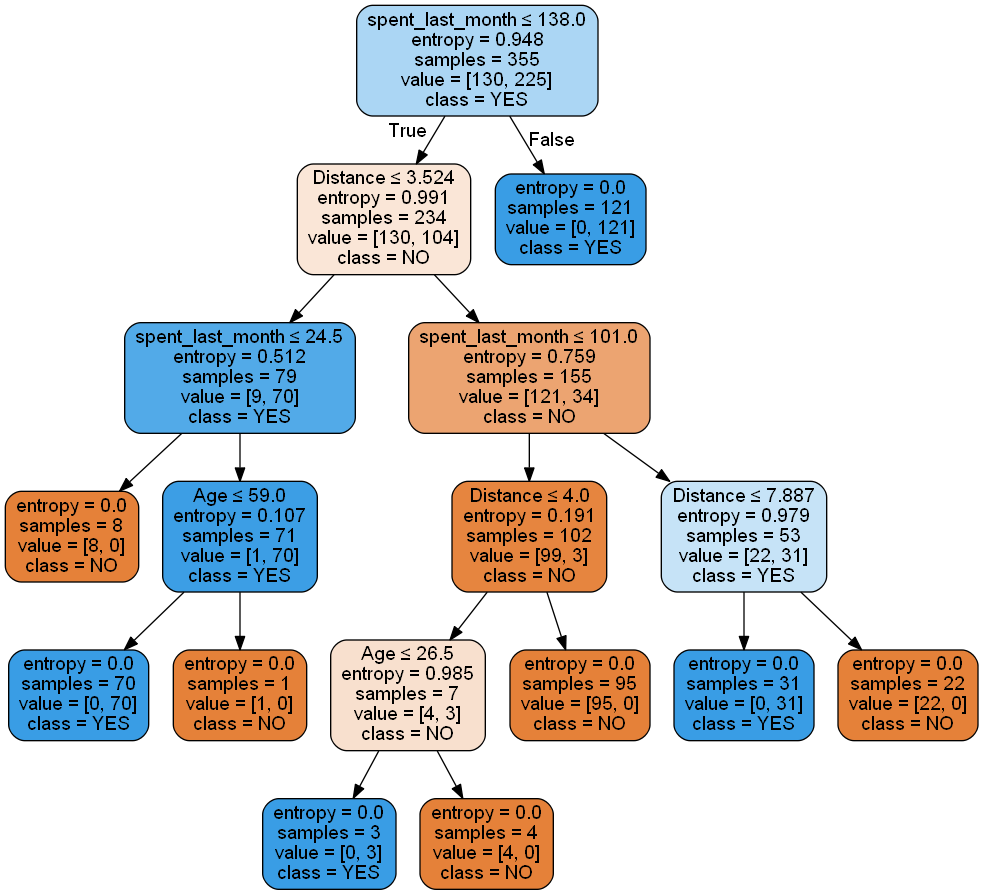

In [110]:
dot_data = StringIO()

tree.export_graphviz(entr_model, class_names=entr_model.classes_, feature_names=X_train.columns, out_file=dot_data, 
                     filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**5b. Model 1: Entropy model - no max_depth: Interpretation and evaluation**

In [111]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


This model is very accurate. Hopefully it is not overfitted.

**5c. Model 2: Gini impurity model - no max_depth**

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [112]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini')

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = gini_model.predict(X_test)

# Check out gini_model
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

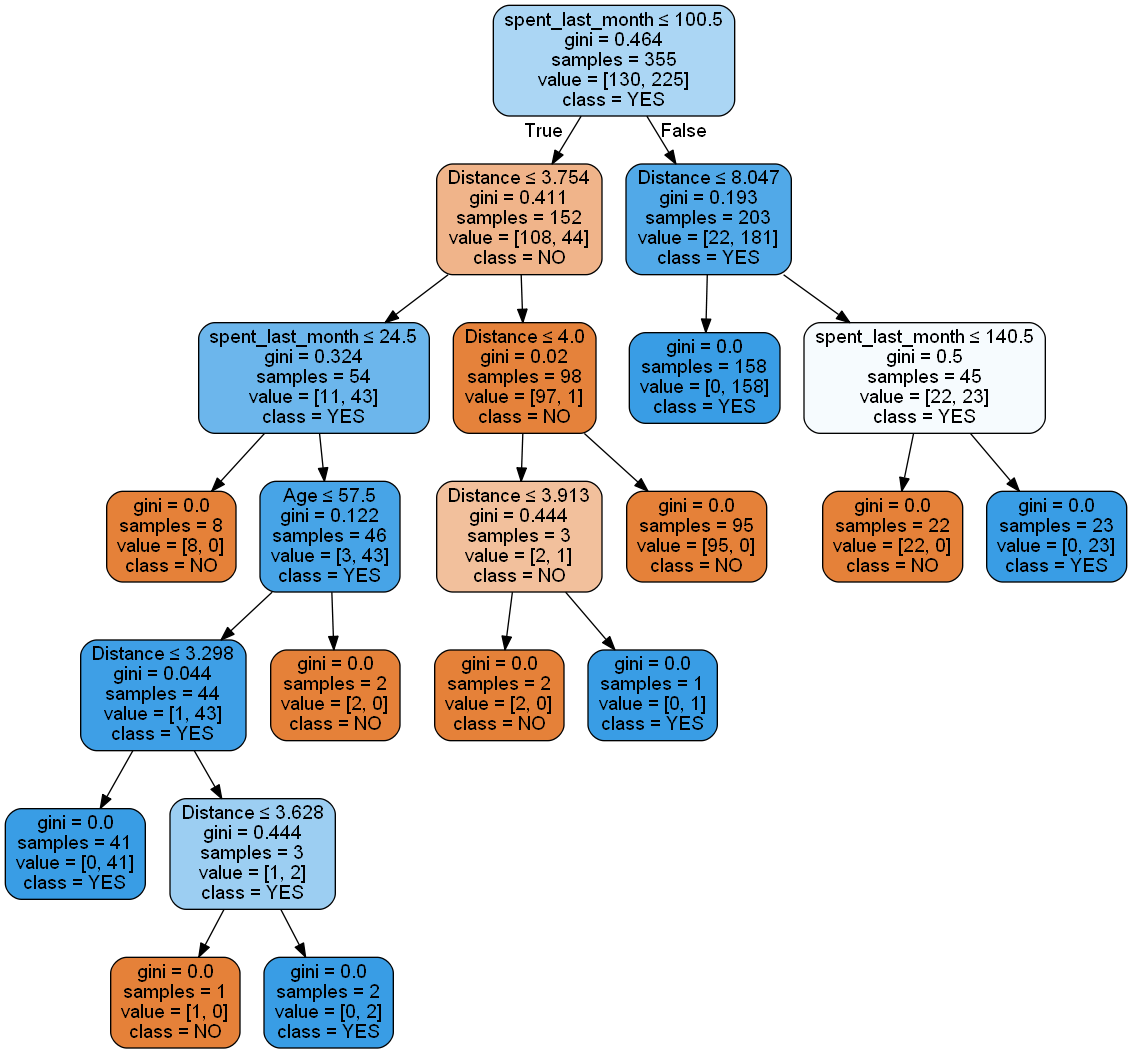

In [113]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model, class_names=gini_model.classes_, feature_names=X_train.columns, out_file=dot_data, 
                     filled=True, rounded=True, special_characters=True)

# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [114]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


The model based on entropy did better.

**5d. Model 3: Entropy model - max depth 3**<br>
We're going to try to limit the depth of our decision tree, using entropy first.  

In [115]:
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
entr_model2.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
pd.Series(y_pred)
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

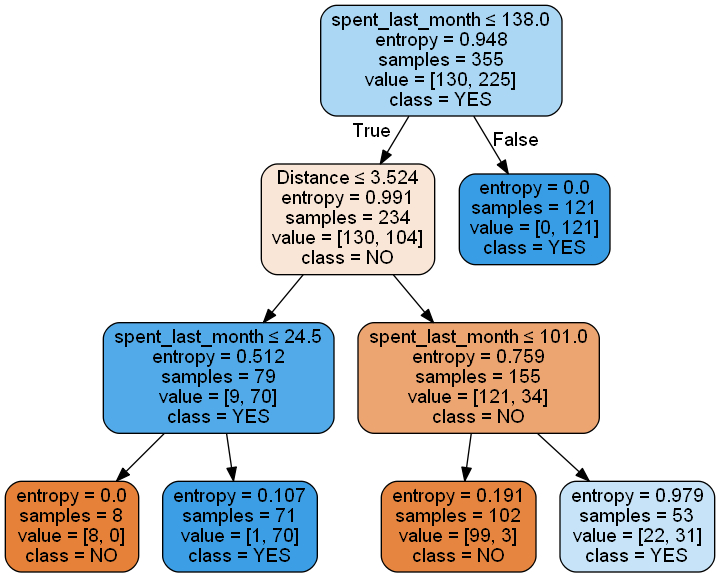

In [116]:
dot_data = StringIO()
tree.export_graphviz(entr_model2, class_names=entr_model2.classes_, feature_names=X_train.columns, out_file=dot_data, 
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [117]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Recall score for "No" 0.975609756097561


So our accuracy decreased, but it's not entirely inferior, as this one could possibly have lower variance.

**5e. Model 4: Gini impurity  model - max depth 3**<br>
We're now going to try the same with the Gini impurity model. 

In [118]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)
gini_model2.fit(X_train, y_train)
gini_model2.predict(X_test)
y_pred = gini_model2.predict(X_test)
gini_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

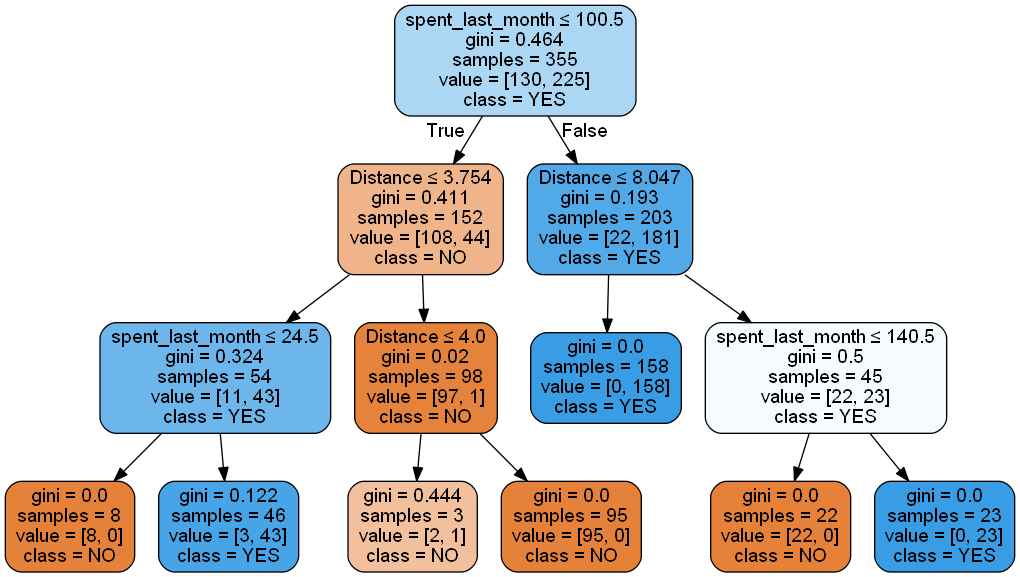

In [119]:
dot_data = StringIO()
tree.export_graphviz(gini_model2, class_names=gini_model2.classes_, feature_names=X_train.columns, out_file=dot_data, 
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [120]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


Now this is an elegant tree. We were able to accomplish a similar accuracy with a much simpler decision tree.

# 6. Evaluating and concluding
**6a. How many customers will buy Hidden Farm coffee?**<br><br>
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [121]:
coffeeData['Decision'].value_counts(dropna=False)

YES    303
NaN    228
NO     171
Name: Decision, dtype: int64

Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [122]:
feature_cols = [column for column in coffeeData.columns if column != 'Decision']

new_x = Prediction[feature_cols]
new_x.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,salary,Distance,Online
1,24,Male,0,44,164,74035,0.520906,0
3,20,Male,0,30,107,13166,0.932098,1
7,24,Female,0,20,34,17425,1.193188,0
11,24,Female,0,40,153,84803,1.655096,1
12,21,Female,0,38,122,42338,1.714179,1


In [123]:
new_x = pd.get_dummies(new_x, drop_first=True)
potential_buyers = gini_model2.predict(new_x)

In [124]:
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [125]:
print(coffeeData.shape[0])

702


In [126]:
NOPrediction_yes = NOPrediction[NOPrediction['Decision'] == 'YES'].shape[0] 
Prediction_yes = np.unique(potential_buyers, return_counts=True)[1][1]
buyers_ratio = (NOPrediction_yes + Prediction_yes) / coffeeData.shape[0]
buyers_ratio

0.6923076923076923

In [127]:
print(str(round(100 * buyers_ratio, 2)) + '%')

69.23%


**6b. Decision**
If more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, I planned to advise RR Diner to strike the deal with the local Hidden Farm farmers and sell the coffee. As such, I won't be striking the deal with the Chinese farmers. Still, at 69.23%, we were very close to the threshold. 

Ultimately, I can't write an algorithm to actually *make the business decision* for someone. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. 

# 7. Random Forest Re-Evaluation

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

**7a. Import necessary modules**

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

**7b. Model**<br>
I'll use my X_train and y_train variables just as before.

I'll then need to make a variable (call it firstRFModel) to store my new Random Forest model. I'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, I'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, I will make a variable called y_pred, and assign it the result of calling the predict() method on my new firstRFModel, with the X_test data passed to it. 

In [129]:
firstRFModel = RandomForestClassifier(max_depth=3, random_state=42)

firstRFModel.fit(X_train, y_train)
firstRFModel.predict(X_test)
y_pred = firstRFModel.predict(X_test)
firstRFModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [133]:
potential_buyers = firstRFModel.predict(new_x)
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 40, 188], dtype=int64))

In [134]:
NOPrediction_yes = NOPrediction[NOPrediction['Decision'] == 'YES'].shape[0] 
Prediction_yes = np.unique(potential_buyers, return_counts=True)[1][1]
buyers_ratio = (NOPrediction_yes + Prediction_yes) / coffeeData.shape[0]
str(round(100 * buyers_ratio, 2)) + '%'

'69.94%'

# 8. Revised conclusion
Although the result is almost 70%, it is not quite there. However, some discretion may be given to the executives, because since our model is not 100% accurate, it is possible the true number of clients who would answer 'YES' is actually above 70%. 